<a href="https://colab.research.google.com/github/SudharsanSrinivasan14/MLP-Plotting-workout/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Shopping_center.csv to Shopping_center.csv


In [4]:
df = pd.read_csv('Shopping_center.csv')

In [5]:
dt = df.copy()

In [6]:
df

,Customer ID,Gender,Age,Annual Income in K$,Spending Points (1-100)
0,15101,Male,19,15,39
1,15102,Male,21,15,81
2,15103,Female,20,16,6
3,15104,Female,23,16,77
4,15105,Female,31,17,40
...,...,...,...,...,...
195,15296,Female,35,120,79
196,15297,Female,45,126,28
197,15298,Male,32,126,74
198,15299,Male,32,137,18


In [35]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Gender']=label_encoder.fit_transform(df['Gender'])
df['Gender'].unique()

array([1, 0])

In [53]:
df

,Customer ID,Gender,Age,Annual Income in K$,Spending Points (1-100)
0,15101,1,19,15,39
1,15102,1,21,15,81
2,15103,0,20,16,6
3,15104,0,23,16,77
4,15105,0,31,17,40
...,...,...,...,...,...
195,15296,0,35,120,79
196,15297,0,45,126,28
197,15298,1,32,126,74
198,15299,1,32,137,18


In [54]:
X = df.iloc[:, [1,4]].values

In [56]:
X1 = df.iloc[:, [2,4]].values

In [57]:
X

array([[ 1, 39],
       [ 1, 81],
       [ 0,  6],
       [ 0, 77],
       [ 0, 40],
       [ 0, 76],
       [ 0,  6],
       [ 0, 94],
       [ 1,  3],
       [ 0, 72],
       [ 1, 14],
       [ 0, 99],
       [ 0, 15],
       [ 0, 77],
       [ 1, 13],
       [ 1, 79],
       [ 0, 35],
       [ 1, 66],
       [ 1, 29],
       [ 0, 98],
       [ 1, 35],
       [ 1, 73],
       [ 0,  5],
       [ 1, 73],
       [ 0, 14],
       [ 1, 82],
       [ 0, 32],
       [ 1, 61],
       [ 0, 31],
       [ 0, 87],
       [ 1,  4],
       [ 0, 73],
       [ 1,  4],
       [ 1, 92],
       [ 0, 14],
       [ 0, 81],
       [ 0, 17],
       [ 0, 73],
       [ 0, 26],
       [ 0, 75],
       [ 0, 35],
       [ 1, 92],
       [ 1, 36],
       [ 0, 61],
       [ 0, 28],
       [ 0, 65],
       [ 0, 55],
       [ 0, 47],
       [ 0, 42],
       [ 0, 42],
       [ 0, 52],
       [ 1, 60],
       [ 0, 54],
       [ 1, 60],
       [ 0, 45],
       [ 1, 41],
       [ 0, 50],
       [ 1, 46],
       [ 0, 51

# **K-Means with out Label Encoding:**

---



In [58]:
# Elbow Method
from sklearn.cluster import KMeans
wcss = [] #within cluster sum of square
for i in range(1, 7):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)

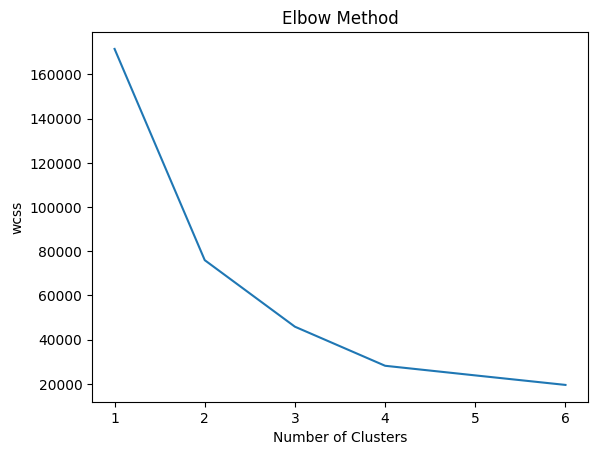

In [59]:
plt.plot(range(1,7),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

In [60]:
# fitting kmeans to dataset
kmeans = KMeans(n_clusters=7, init='k-means++', n_init=20, max_iter=500, random_state=10)
Y_kmeans = kmeans.fit_predict(X1)

In [61]:
Y_kmeans

array([6, 0, 4, 0, 6, 0, 4, 3, 1, 0, 1, 3, 1, 0, 4, 0, 2, 0, 1, 3, 2, 0,
       1, 0, 1, 3, 2, 0, 2, 3, 1, 0, 1, 3, 1, 0, 1, 0, 4, 0, 5, 3, 2, 0,
       1, 0, 2, 6, 6, 6, 2, 0, 6, 5, 2, 2, 2, 5, 6, 2, 5, 6, 5, 5, 5, 6,
       2, 5, 6, 6, 5, 2, 5, 5, 5, 6, 2, 2, 6, 2, 5, 2, 5, 2, 6, 2, 5, 6,
       0, 2, 5, 6, 2, 2, 6, 6, 2, 6, 2, 6, 6, 2, 5, 6, 2, 6, 5, 2, 5, 5,
       5, 6, 2, 6, 6, 6, 5, 2, 2, 2, 6, 2, 2, 3, 4, 0, 2, 3, 1, 0, 1, 0,
       6, 0, 4, 3, 1, 0, 4, 0, 1, 3, 6, 3, 4, 3, 2, 0, 4, 3, 1, 3, 1, 0,
       1, 3, 4, 0, 4, 0, 2, 3, 4, 3, 1, 0, 1, 3, 4, 0, 4, 0, 4, 3, 1, 3,
       1, 0, 1, 3, 2, 3, 1, 3, 2, 3, 1, 0, 1, 3, 4, 0, 4, 3, 1, 0, 1, 0,
       4, 3], dtype=int32)

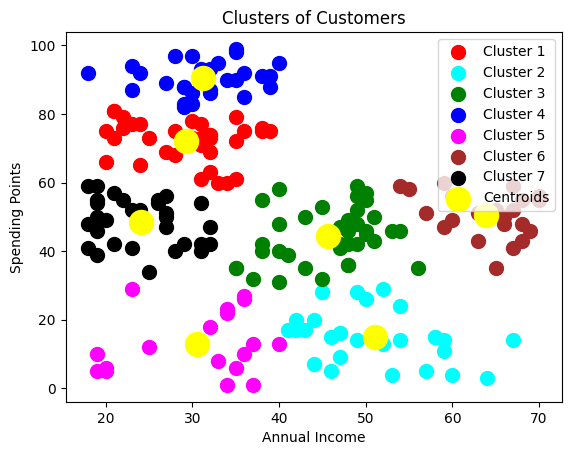

In [62]:
plt.scatter(X1[Y_kmeans==0, 0], X1[Y_kmeans==0, 1], s=100, c='red', label= 'Cluster 1')
plt.scatter(X1[Y_kmeans==1, 0], X1[Y_kmeans==1, 1], s=100, c='cyan', label= 'Cluster 2')
plt.scatter(X1[Y_kmeans==2, 0], X1[Y_kmeans==2, 1], s=100, c='green', label= 'Cluster 3')
plt.scatter(X1[Y_kmeans==3, 0], X1[Y_kmeans==3, 1], s=100, c='blue', label= 'Cluster 4')
plt.scatter(X1[Y_kmeans==4, 0], X1[Y_kmeans==4, 1], s=100, c='magenta', label= 'Cluster 5')
plt.scatter(X1[Y_kmeans==5, 0], X1[Y_kmeans==5, 1], s=100, c='brown', label= 'Cluster 6')
plt.scatter(X1[Y_kmeans==6, 0], X1[Y_kmeans==6, 1], s=100, c='black', label= 'Cluster 7')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids' )
plt.title('Clusters of Customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Points')
plt.legend()
plt.show()

#**K-Means with Label Encoding:**

---

In [ ]:
# Elbow Method
from sklearn.cluster import KMeans
wcss = [] #within cluster sum of square
for i in range(1, 3):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

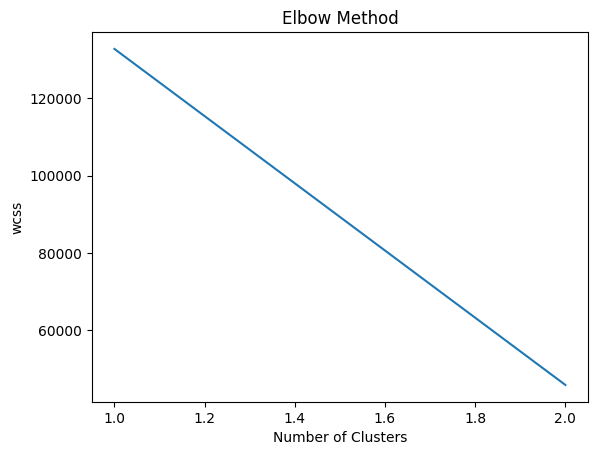

In [ ]:
plt.plot(range(1,3),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

In [ ]:
# fitting kmeans to dataset
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=20, max_iter=500, random_state=10)
Y_kmeans = kmeans.fit_predict(X)

In [ ]:
Y_kmeans

array([0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 0, 1,
       2, 1, 2, 1, 0, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

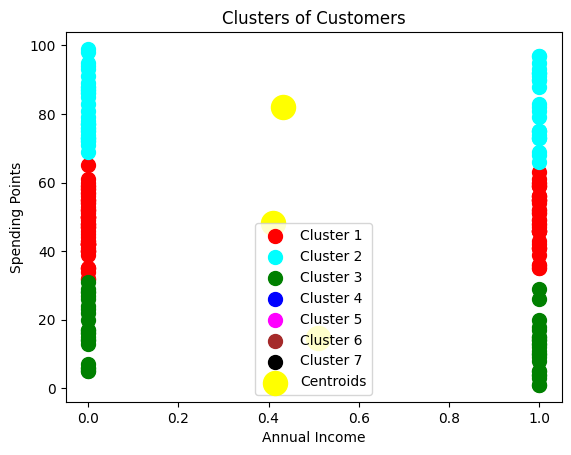

In [ ]:
plt.scatter(X[Y_kmeans==0, 0], X[Y_kmeans==0, 1], s=100, c='red', label= 'Cluster 1')
plt.scatter(X[Y_kmeans==1, 0], X[Y_kmeans==1, 1], s=100, c='cyan', label= 'Cluster 2')
plt.scatter(X[Y_kmeans==2, 0], X[Y_kmeans==2, 1], s=100, c='green', label= 'Cluster 3')
plt.scatter(X[Y_kmeans==3, 0], X[Y_kmeans==3, 1], s=100, c='blue', label= 'Cluster 4')
plt.scatter(X[Y_kmeans==4, 0], X[Y_kmeans==4, 1], s=100, c='magenta', label= 'Cluster 5')
plt.scatter(X[Y_kmeans==5, 0], X[Y_kmeans==5, 1], s=100, c='brown', label= 'Cluster 6')
plt.scatter(X[Y_kmeans==6, 0], X[Y_kmeans==6, 1], s=100, c='black', label= 'Cluster 7')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids' )
plt.title('Clusters of Customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Points')
plt.legend()
plt.show()

# **Hierarchical with Label Encoding :**

---



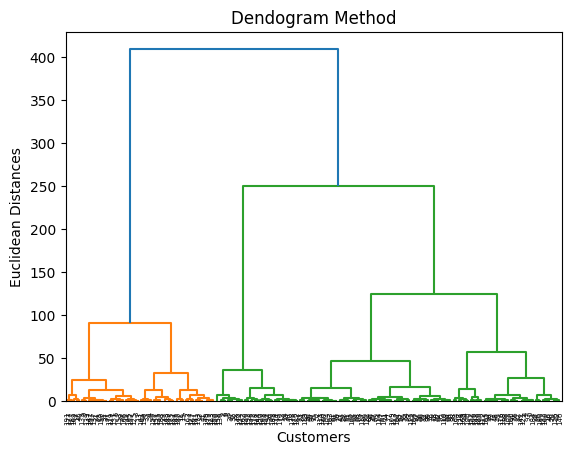

In [73]:
# Dendogram Method
import scipy.cluster.hierarchy as sch
d_gram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendogram Method')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.savefig('img_0.png', dpi=50)
plt.show()

In [74]:
# Fitting Hierarchical Cluster Analysis to dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=7, affinity="euclidean", linkage='ward')
Y_hc = hc.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


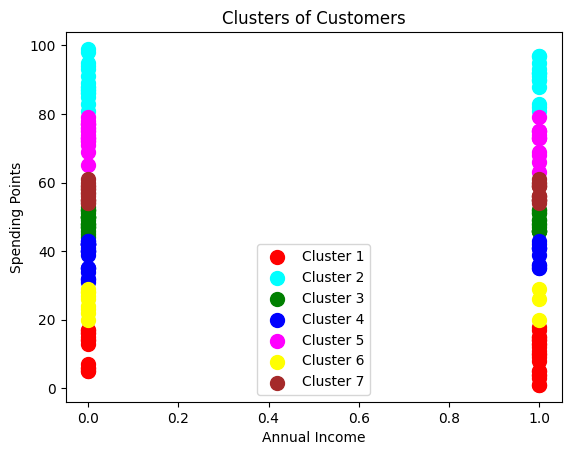

In [75]:
# Visualising the clusters
plt.scatter(X[Y_hc==0, 0], X[Y_hc==0, 1], s=100, c='red', label= 'Cluster 1')
plt.scatter(X[Y_hc==1, 0], X[Y_hc==1, 1], s=100, c='cyan', label= 'Cluster 2')
plt.scatter(X[Y_hc==2, 0], X[Y_hc==2, 1], s=100, c='green', label= 'Cluster 3')
plt.scatter(X[Y_hc==3, 0], X[Y_hc==3, 1], s=100, c='blue', label= 'Cluster 4')
plt.scatter(X[Y_hc==4, 0], X[Y_hc==4, 1], s=100, c='magenta', label= 'Cluster 5')
plt.scatter(X[Y_hc==5, 0], X[Y_hc==5, 1], s=100, c='Yellow', label= 'Cluster 6')
plt.scatter(X[Y_hc==6, 0], X[Y_hc==6, 1], s=100, c='brown', label= 'Cluster 7')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Points')
plt.legend()
plt.show()

# **Hierarchical with out Label Encoding :**

---



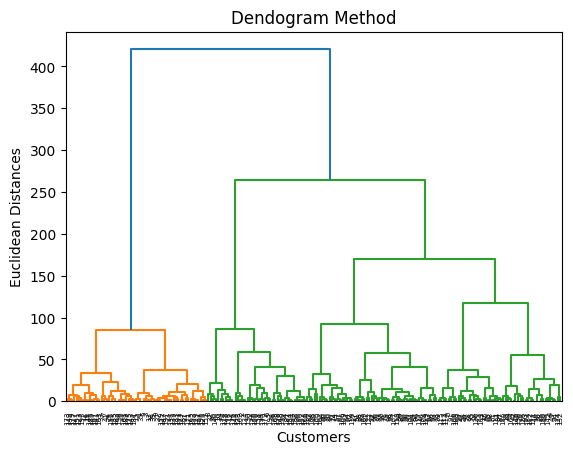

In [76]:
# Dendogram Method
import scipy.cluster.hierarchy as sch
d_gram = sch.dendrogram(sch.linkage(X1, method='ward'))
plt.title('Dendogram Method')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.savefig('img_0.png', dpi=50)
plt.show()

In [77]:
# Fitting Hierarchical Cluster Analysis to dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage='ward')
Y_hc = hc.fit_predict(X1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


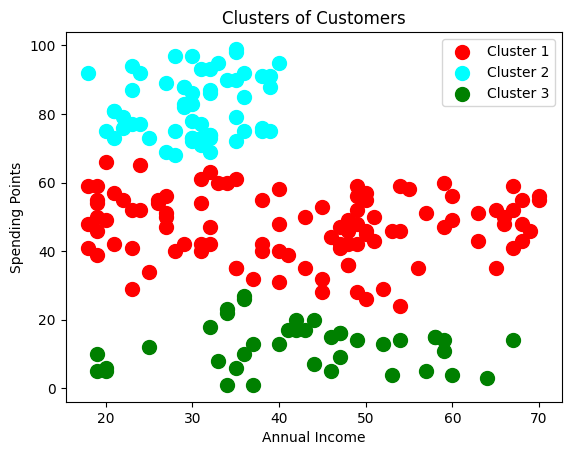

In [78]:
# Visualising the clusters
plt.scatter(X1[Y_hc==0, 0], X1[Y_hc==0, 1], s=100, c='red', label= 'Cluster 1')
plt.scatter(X1[Y_hc==1, 0], X1[Y_hc==1, 1], s=100, c='cyan', label= 'Cluster 2')
plt.scatter(X1[Y_hc==2, 0], X1[Y_hc==2, 1], s=100, c='green', label= 'Cluster 3')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Points')
plt.legend()
plt.show()